In this jupyter notebook I attempted to predict of price of houses in Washington state, usa

In [2]:
import csv
import pandas as pd
import numpy as np
data = pd.read_csv('/content/drive/MyDrive/Year 4/Data Science And Machine Learning/Project/House Price Predictor - Linear Regression/data.csv')

x = data[['sqft_living']] # Sets x axis as square footage
y = data['price'] # Sets y as price
print(x)

      sqft_living
0            1340
1            3650
2            1930
3            2000
4            1940
...           ...
4595         1510
4596         1460
4597         3010
4598         2090
4599         1490

[4600 rows x 1 columns]


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

<ipython-input-3-444997ff90a3>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


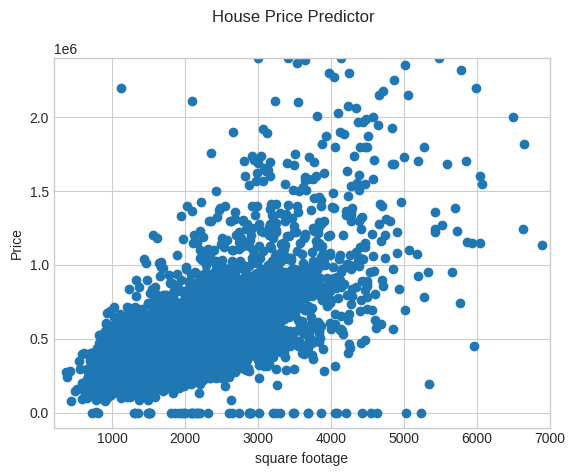

In [35]:
plt.suptitle('House Price Predictor') # Title of graph
plt.xlabel('square footage') # Label for x axis
plt.ylabel('Price') # Label for y axis
plt.axis([200,7000,-100000,2400000]) # Axis limits for graph
plt.scatter(x,y) # Plots all the scatter points
plt.show()

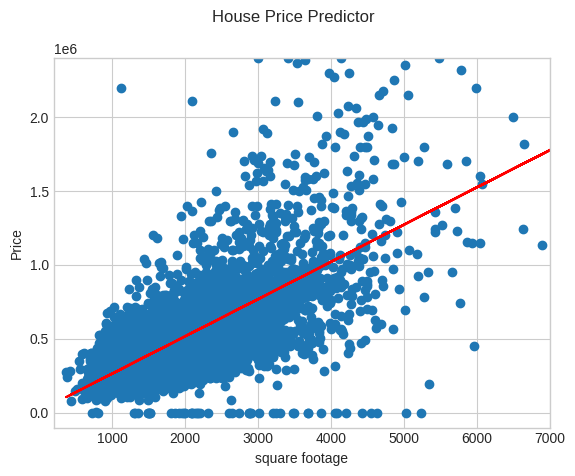

In [36]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x, y) # Trains the ML model on the data
yPredict = model.predict(x) #Sets variable that predicts the y axis

plt.suptitle('House Price Predictor')
plt.xlabel('square footage')
plt.ylabel('Price')
plt.axis([200,7000,-100000,2400000])
plt.scatter(x,y)
plt.plot(x,yPredict, color='red', label='Regression line') #Plots the regression line
plt.show()

In [6]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     251.95013105923726
Model intercept: 12954.242396381567


In [7]:
from sklearn.metrics import r2_score
r_squared = r2_score(y,yPredict) #Gets the r2 score
print("R Squared value is : ", r_squared)

R Squared value is :  0.18525278999291528


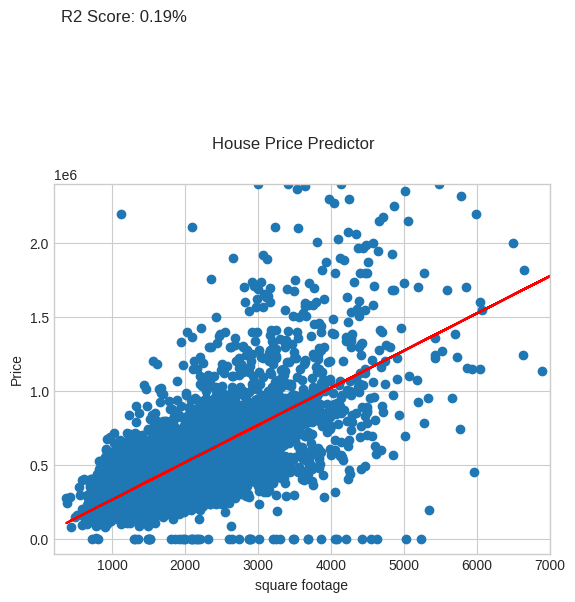

In [38]:
plt.suptitle('House Price Predictor')
plt.xlabel('square footage')
plt.ylabel('Price')
plt.axis([200,7000,-100000,2400000])
plt.scatter(x,y)
plt.plot(x,yPredict, color='red', label='Regression line')
#Places the r2 score on the graph
plt.text(300, 3500000,f"R2 Score: {round(r_squared,2)}%",fontsize=12)
plt.show()

As you saw above the graph contains a lot of outliers and 0 values, below I attempt to remove them

<Axes: ylabel='price'>

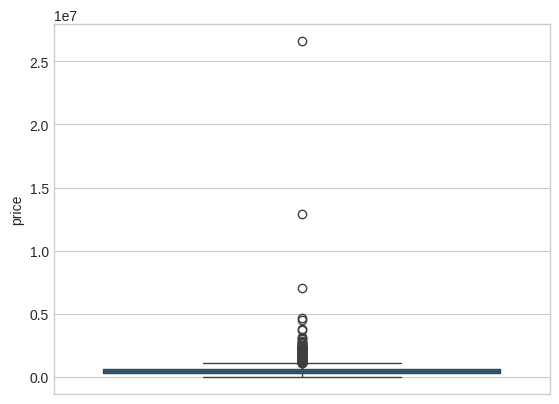

In [9]:
import seaborn as sns
df_homes= pd.DataFrame(data)
sns.boxplot(df_homes['price'])
# Created a box plot to see where majority of data is

<Axes: ylabel='price'>

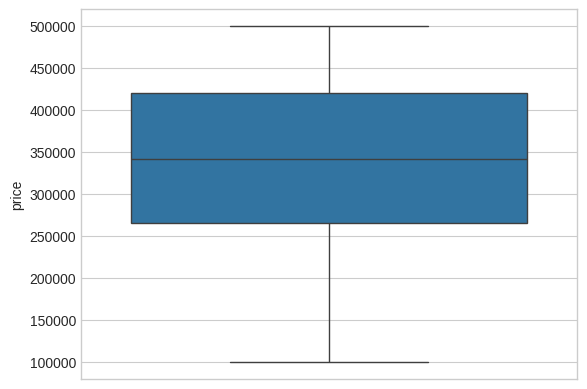

In [10]:
#Below I remove the outliers in the data
removed_outliers = df_homes[df_homes['price']<=500000]
removed_outliers = removed_outliers[removed_outliers['price']>=100000]
sns.boxplot(removed_outliers['price'])

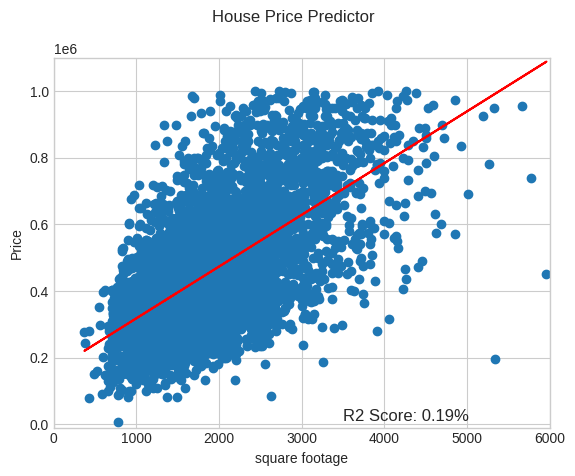

In [24]:
#New graph without outliers
y2 = removed_outliers['price']
x2 = removed_outliers[['sqft_living']]
model.fit(x2, y2) # Trains the ML model on the data
yPredict2 = model.predict(x2) #Sets variable that predicts the y axis
plt.suptitle('House Price Predictor')
plt.xlabel('square footage')
plt.ylabel('Price')
plt.axis([0,6000,-10000,1100000])
plt.scatter(x2,y2)
plt.plot(x2,yPredict2, color='red', label='Regression line')
#Places the r2 score on the graph
plt.text(3500, 10000,f"R2 Score: {round(r_squared,2)}%",fontsize=12)
plt.show()

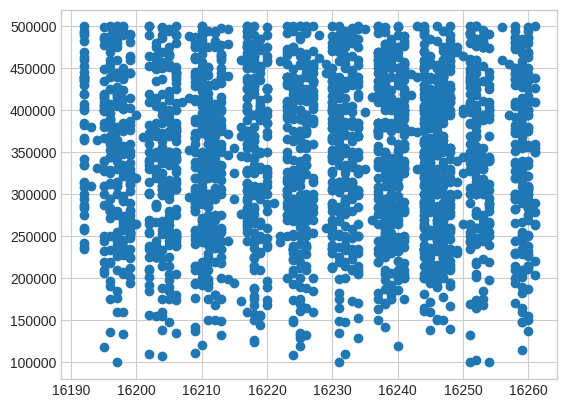

In [11]:
#Here I am testing out how to use date data on a scatter graph
import matplotlib.dates as mdates

x_date = mdates.datestr2num(removed_outliers[['date']])
y_price = removed_outliers['price']
plt.scatter(x_date,y_price)

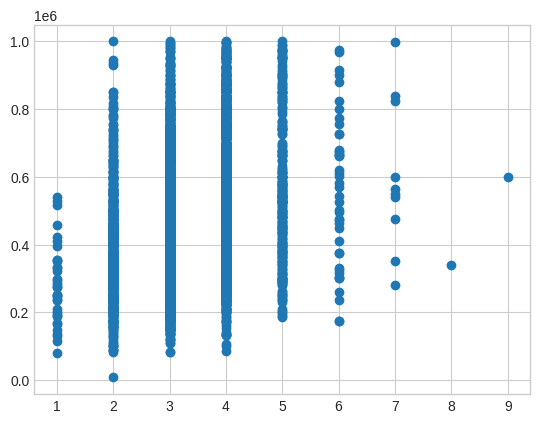

In [12]:
#Here I wanted to check visually the corrolation between the amount
#of bedrooms and price, as you can see below there isn't a large
#colloration
removed_outliers = df_homes[df_homes['price']<=1000000]
removed_outliers = removed_outliers[removed_outliers['price']>=100]
x3 = removed_outliers[["bedrooms"] ]
y3 = removed_outliers['price']
plt.scatter(x3,y3)

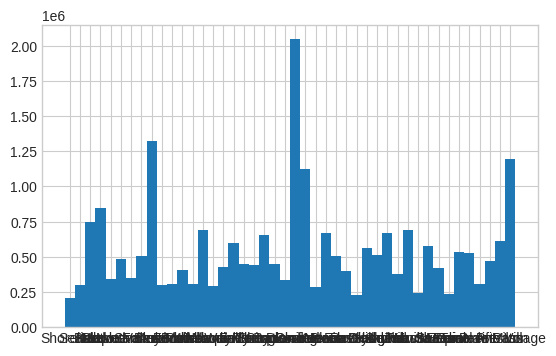

In [13]:
from matplotlib.widgets import Slider
x4 = df_homes['city'].unique() #Removed duplicate cities
#Tried to get the mean price per city
y4 = df_homes.groupby('city')['price'].mean()

#Displayed the data on a bar graph, but its quite squished, a solution for this
#I think would be to add a scroll function or just keep the most populous cities
Plot, Axis = plt.subplots()
plt.subplots_adjust(bottom=0.25)
plt.bar(x4, y4, width=1)
plt.show()